# Исследование стартапов для финансовой компании

## Цель и задачи проекта
**Цель:** Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса. \
**Задачи:** 
* Загрузить и первично предобработать
* Предобработать данные, предварительно исследовать
* Выполнить исследовательский анализ объединённых таблиц
* Сделать итоговый вывод и рекомендации

## Структура проекта 
* Знакомство с данными: загрузка и первичная предобработка
* Предобработка данных, предварительное исследование
* Исследовательский анализ объединённых таблиц
* Итоговый вывод и рекомендации

## Знакомство с данными: загрузка и первичная предобработка
### Вывод общей информации, исправление названия столбцов

In [1]:
# Импортируем библиотеки 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Глобальная настройка формата вывода вещественных чисел
pd.options.display.float_format = '{:.2f}'.format

Судя из описания данных, что названия столбцов в датафрейме `companies_df` находятся в неудобном виде, проверим это

In [4]:
companies_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

Это действительно так, приведем их к snake_case

In [5]:
companies_df.columns = companies_df.columns.str.replace('  ', '_')
companies_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Посмотрим общую информацию о каждом датасете

In [6]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

In [7]:
companies_df.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,5250000.00,0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,9500000.00,0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,2312.00,1.00,2008-05-19,series-c+,25000000.00,0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [9]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [10]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [11]:
degr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


* Можно заметить что в `company_and_rounds.csv` есть два столбца с одинаковыми названиями company ID и company id, есть предположение, что это из-за того, что датасет "склеен" из двух датасетов, это будет проверено в пункте 6.3

### Смена типов и анализ пропусков

В датафрейме companies_df имеется 12 столбцов с неправильными типами данных, которые нужно заменить:
1. `company_ID` float -> int
2. `founded_at` object -> datetime
3. `closed_at` object -> datetime
4. `investment_rounds` float -> int
5. `funding_rounds` float -> int
6. `milestones` float -> int
7. `funding_round_id` float -> int
8. `company_id` float -> int
9. `funded_at` object -> datetime
10. `participants` float -> int
11. `is_first_round` float -> int
12. `is_last_round` float -> int
В датафрейме acq_df имеется 1 столбец с неправильным типом данных:
1. `acquired_at`  object -> datetime
В датафрейме people_df имеется 1 столбец с неправильным типом данных:
1. `company_id` float -> int
В датафрейме edu_df имеется 1 столбец с неправильным типом данных:
1. `graduated_at` object -> datetime
В датафрейме degr_df имеется 1 столбец с неправильным типом данных:
1. `object_id` object -> int
В стлучае со столбцами, которые значения даты произведем замену, столбцы же которые должны иметь целочисленный тип, пока трогать не будем так, сначала нужно поработать с пропусками в них

In [12]:
# Функция для изменения и проверки типа данных столбца датафрейма
def change_dtype(df, col):
    df[col] = pd.to_datetime(df[col])
    print(f'Тип данных столбца {col} - {df[col].dtype}')

In [13]:
# Применение функции к нужным столбцам
columns = ['founded_at', 'closed_at', 'funded_at']
for col in columns:
    change_dtype(companies_df, col)
change_dtype(acq_df, 'acquired_at')
change_dtype(edu_df, 'graduated_at')

Тип данных столбца founded_at - datetime64[ns]
Тип данных столбца closed_at - datetime64[ns]
Тип данных столбца funded_at - datetime64[ns]
Тип данных столбца acquired_at - datetime64[ns]
Тип данных столбца graduated_at - datetime64[ns]


In [14]:
companies_df.isna().mean() * 100

company_ID             0.14
name                   0.14
category_code         33.93
status                 0.14
founded_at            49.51
closed_at             98.42
domain                32.43
network_username      56.13
country_code          50.13
investment_rounds      0.14
funding_rounds         0.14
funding_total          0.14
milestones             0.14
funding_round_id      75.70
company_id            75.70
funded_at             75.81
funding_round_type    75.70
raised_amount         75.70
pre_money_valuation   75.70
participants          75.70
is_first_round        75.70
is_last_round         75.70
dtype: float64

Разберем каждый датасет на предмет пропусков отдельно \
`company_and_rounds`: 
1. В датасете много пропусков
2. В основном они находятся в столбцах в информации о раундах финансирования, эта информация важна для заказчика, над этим нужно поработать
3. В основных столбцах тоже есть пропуски при чем одинаковое и незначительное количество (0.13%), эти данные в дальнейшем можно удалить
4. есть два столбца `company_ID` и `company_id` возможно пропущенные значения из одного можно восполнить значениями другого \
`acquisition`:
1. Имеется незначительное количество пропусков в `acquired_at`
2. Имеется значительное количество пропусков в `term_code`, однако для дальнейшего анализа он потребуется \
`people`:
1. Имеются пропуски в столбце `company_id`, скорее всего это не вызовет проблем в последующем анализе
2. Имеются пропуски в столбце `network_username`, это незначительная для анализа информация \
`education`:
1. В этом датасете находится информация не обо всех сотрудниках
2. А также столбцы имеющие данные об образовании сотрудников имеют пропуски, пока неизвестно, это ошибка или особенность данных
Тоже самое касается датасета `degrees`

### Промежуточные выводы
1. загружены вс датасеты необходимые для проекта
2. проверены и преведены к snake_case названия столбцов дататсета `company_and_rounds`
3. тип данных столбцов с датой изменен на datetime
4. оставльные столбцы с неправильными типами данных, пока не приведены к правильным типам, требуется обработка пропусков, однако для этого тркбуется более глубокое погружение в суть данных, возможно пропуски являются не ошибками, а индикаторами
5. Достаточно большая часть данных, нужных заказчику, утеряна

## Предобработка данных, предварительное исследование
### Раунды финансирования по годам

In [15]:
# Выделим год из даты финансирования
companies_df['funded_at_year'] = companies_df['funded_at'].dt.year.astype('Int64')
# Создадим сводную таблицу
table = companies_df.groupby('funded_at_year')['raised_amount'].agg(['median', 'count'])
table = table.rename(columns={'median': 'invest_number', 'count': 'rounds'})
table['invest_number'] = table['invest_number'] / 1e6
table = table[table['rounds'] > 50]
table

,invest_number,rounds
funded_at_year,,
1999,2.00,76
2000,4.20,125
2001,3.00,96
2002,4.20,116
2003,3.00,159
2004,5.00,291
2005,5.50,1633
2006,5.00,2436
2007,3.97,3279


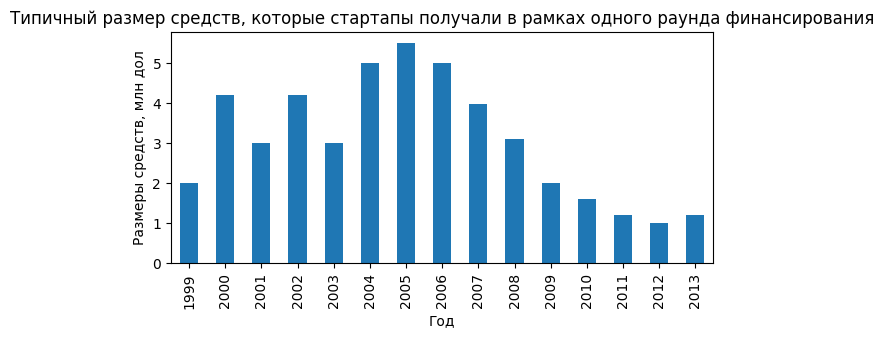

In [16]:
# Визуализируем таблицу
table['invest_number'].plot(
    kind='bar',
    figsize=(7, 3)
)
plt.xlabel('Год')
plt.ylabel('Размеры средств, млн дол')
plt.title('Типичный размер средств, которые стартапы получали в рамках одного раунда финансирования')
plt.show()

* На визуализации видно, что типичный размер собранных в рамках одного раунда средств был максимален в 2005 году
* 2013 году наблюдалось снижение темпов падения и даже небольшой рост количества выделяемых средств

### Люди и их образование

Чтобы оценить насколько информация об образовании сотрудников полна, объеденим датасеты people и education

In [17]:
# Объединение датафреймов
people_df = pd.merge(people_df, edu_df, left_on='id', right_on='person_id', how='left', suffixes = ('_people','_education'))
people_df[people_df['company_id'] == 1]

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
4393,104800,Alex,Weinstein,1.00,alexweinstein,NaN,NaN,NaN,NaT
191139,3,Kevin,Flaherty,1.00,NaN,706.00,3.00,Washington University in St Louis,NaT
191140,3,Kevin,Flaherty,1.00,NaN,707.00,3.00,Indiana University,NaT


In [18]:
# Проверка объединения
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int64         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 18.4+ MB


In [19]:
# Подсчет количества работников и количество записей об образовании в компаниях
companies = (people_df.groupby('company_id').agg({
    'id_people': 'nunique',   
    'person_id': 'nunique'      
})).reset_index()
companies = companies.rename(columns={'id_people': 'num_people', 'person_id': 'num_educated'})
# Вывод различных количеств сотрудников в компаниях
companies['num_people'].value_counts()

num_people
1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
23         3
19         3
20         3
18         3
15         3
29         2
25         2
56         2
22         2
21         2
31         1
138        1
35         1
47         1
32         1
39         1
63         1
36         1
51         1
48         1
244        1
61         1
150        1
26         1
72         1
Name: count, dtype: int64

Разделим компании на 9 групп: 1, 2, 3, 4, 5, 6-7, 8-13, 14-29, 30+. Такие числа выбраны в зависимости от количества компаний с таким количеством сотрудников

In [20]:
# Делим на категории
bins = [0, 1, 2, 3, 4, 5, 7, 13, 29, float('inf')]
labels = ['1', '2', '3', '4', '5', '6-7', '8-13', '14-29', '30+']
companies['category'] = pd.cut(companies['num_people'], bins=bins, labels=labels)
companies

,company_id,num_people,num_educated,category
0,1.00,2,1,2
1,2.00,1,1,1
2,3.00,3,2,3
3,4.00,13,12,8-13
4,5.00,61,45,30+
...,...,...,...,...
22917,285897.00,2,2,2
22918,285953.00,1,0,1
22919,285972.00,2,1,2
22920,285996.00,1,1,1


In [21]:
# Подсчитаем долю людей без информации об образовании
companies['proportion_educated'] = companies['num_educated'] / companies['num_people']
companies.groupby('category')['proportion_educated'].mean()

C:\Users\never\AppData\Local\Temp\ipykernel_2136\1014803766.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  companies.groupby('category')['proportion_educated'].mean()


category
1       0.54
2       0.53
3       0.51
4       0.52
5       0.48
6-7     0.48
8-13    0.48
14-29   0.55
30+     0.76
Name: proportion_educated, dtype: float64

По моему мнению присоединеник таблицы degrees.csv необязательно, так как о наличии или отсудствии информации об образовании можно судить и по данным из таблицы education.csv

Гипотеза заказчика о том, что полнота сведений зависит от размеров компании частично подтвердилась. Как видно из таблицы в средних стартапах средняя доля сотрудников без образования выше чем в крупных и мелких

### Объединять или не объединять — вот в чём вопрос

Для того чтобы понять можно ли объединять таблицы по столбцу `network_username` необходимо понять если пересечения между `network_username` из `company_and_rounds.csv` и  `network_username` из `people.csv`

In [22]:
# Подсчитываем количество пересечений в двух столбцах
len(set(companies_df['network_username'].dropna().unique()).intersection(set(people_df['network_username'].dropna().unique())))

2199

Определенно совпадения есть, однако в первом датасете 217774 строк, во втором - 226709, явно при объединении по этому столбцу произойдет большая потеря данных, поэтому по столбцу `network_username` нельзя объединять таблицы

### Проблемный датасет и причина возникновения пропусков

Судя по информации о таблице `company_and_rounds.csv`, которая была получена при знакомстве с данными, гипотеза заказчика верна, изначально этот датасет состоял из двух:
* датасета `company`, в котором содержалась информация о компаниях, с первичным ключом `company_ID`
* датасета `rounds`, в котором содержалась информация о раундах финансирования, с первичным ключом `funding_round_id` и `company_id` внешним, посредством которого таблица соединялась с таблицей `companies`
Приведем таблицы в первоначальный вид

In [23]:
# Составляем списки столбцов для разделения
company_lst = [
    'company_ID', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
    'domain', 'network_username', 'country_code', 'investment_rounds',
    'funding_rounds', 'funding_total', 'milestones'
]
rounds_lst = [
    'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants',
    'is_first_round', 'is_last_round'
]
#Разделяем датафрейм
company_df = companies_df[company_lst]
rounds_df = companies_df[rounds_lst]

In [24]:
# Дополнительно удалим полные дупликаты в company_df и переименуем столбец id
company_df.drop_duplicates(keep='first', inplace=True)
company_df.columns = company_df.columns.str.lower()

C:\Users\never\AppData\Local\Temp\ipykernel_2136\2796491751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.drop_duplicates(keep='first', inplace=True)


In [25]:
# Проверяем
company_df.info()
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memor

## Исследовательский анализ объединённых таблиц
### Объединение данных

In [26]:
# Объединение данных
df = pd.merge(company_df, acq_df, left_on='company_id', right_on='acquired_company_id', how='left')

In [27]:
# Фильтрация данных
df = df[(df['funding_rounds'] > 0) | (df['investment_rounds'] > 0) | (df['status'] == 'acquired')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40890 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id                  

In [28]:
# Проверка на дубликаты 
df[df.duplicated('company_id', keep=False) == True].head(16)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1731,10963.00,TNC,web,acquired,2004-01-01,NaT,tnccompany.com,NaN,NaN,0.00,1.00,0.00,2.00,542.00,59.00,10963.00,NaN,0.00,2008-09-12
1732,10963.00,TNC,web,acquired,2004-01-01,NaT,tnccompany.com,NaN,NaN,0.00,1.00,0.00,2.00,2484.00,59.00,10963.00,NaN,0.00,2008-09-12
2600,11716.00,Hotjobs,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.00,0.00,0.00,3.00,2985.00,1735.00,11716.00,cash,225000000.00,2010-02-03
2601,11716.00,Hotjobs,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.00,0.00,0.00,3.00,9033.00,29.00,11716.00,cash,436000000.00,2002-01-11
2892,11943.00,Opusforum.org,NaN,acquired,NaT,NaT,NaN,NaN,DEU,0.00,0.00,0.00,0.00,633.00,20.00,11943.00,NaN,0.00,2005-06-30
2893,11943.00,Opusforum.org,NaN,acquired,NaT,NaT,NaN,NaN,DEU,0.00,0.00,0.00,0.00,8562.00,204845.00,11943.00,NaN,0.00,2005-01-01
3185,1216.00,Evite,web,acquired,1998-01-01,NaT,evite.com,evite,USA,0.00,0.00,0.00,2.00,198.00,185.00,1216.00,NaN,0.00,2001-03-09
3186,1216.00,Evite,web,acquired,1998-01-01,NaT,evite.com,evite,USA,0.00,0.00,0.00,2.00,6238.00,1504.00,1216.00,stock,0.00,2010-12-02
4025,12829.00,Menupages,web,acquired,NaT,NaT,menupages.com,NaN,NaN,0.00,0.00,0.00,2.00,1810.00,8252.00,12829.00,NaN,0.00,2008-07-16
4026,12829.00,Menupages,web,acquired,NaT,NaT,menupages.com,NaN,NaN,0.00,0.00,0.00,2.00,6213.00,117902.00,12829.00,NaN,0.00,2011-09-26


Да дубликаты по столбцу `company_id` имеются, однако это указывает на то, что одна компания покупала (поглощала) несколько других, эти данные нужны для дальнейшего анализа, избавляться от дубликатов не будем 

### Анализ выбросов

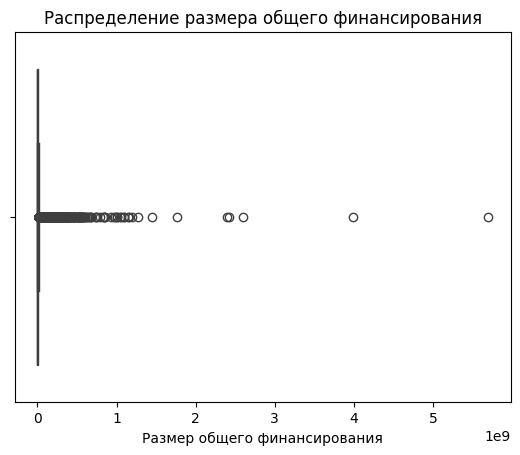

In [29]:
# Постороим диаграмму для оценки типичных размеров финансирования
sns.boxplot(data=df, x='funding_total')
plt.xlabel('Размер общего финансирования')
plt.title('Распределение размера общего финансирования')
plt.show()

Судя по данным типичным объемом финансирования будет 0 долларов, выбивающимися же значениями будут значения больше нескольких миллионов долларов

In [30]:
df['funding_total'].describe()

count        40890.00
mean      10135585.95
std       56412886.91
min              0.00
25%              0.00
50%         600000.00
75%        5631320.00
max     5700000000.00
Name: funding_total, dtype: float64

Из описания данных столбца видим, что четверть данных это 0, значение медианы меньше миллиона, а максимальное значение больше 3 квартиля почти в 1000 раз. Среднее существено больше медианы, а среднее отклонение достаточно, что говорит нам об сильной положительной скошенности и большом количестве выбросов. Возможно большие значения выбросов это не аномалия, а особенность.\
Обычные методы нахождения типичных значений неподойдут из-за большого разброса значений. 

### Куплены забесплатно?

In [31]:
# Отфильтруем компании, в которых был ненулевой объём финансирования, но при этом купленых за 0 или 1 доллар
df_filtered = df[(df['price_amount'] < 2) & (df['funding_total'] != 0)]
df_filtered.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
66,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,121500000.00,3.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
170,101312.00,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.00,3.00,4000000.00,2.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
177,101340.00,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.00,1.00,250000.00,1.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
181,10137.00,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.00,3.00,1310000.00,2.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
184,10139.00,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.00,2.00,44925000.00,1.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01


In [32]:
# Найдем верхнюю и нижнюю границу выбросов для столбца funding_total
q1, q3 = df['funding_total'].quantile(.25), df['funding_total'].quantile(.75)
iqr = q3 - q1
low_whisker = max(q1 - 1.5 * iqr, 0)
up_whisker = q3 + 1.5 * iqr
print(low_whisker, up_whisker) 

0 14078300.0


In [33]:
# Определение процентилям 
low_percentile = df['funding_total'][df['funding_total'] < low_whisker].count() / df.shape[0]
up_percentile = round(df['funding_total'][df['funding_total'] < up_whisker].count() / df.shape[0], 2)
print('Нижняя граница соотвествует ' + str(low_percentile) + ' процентилю, верхняя граница - ' + str(up_percentile * 100))

Нижняя граница соотвествует 0.0 процентилю, верхняя граница - 86.0


### Цены стартапов по категориям

In [34]:
# Расчитаем среднюю цену и разброс цен для каждой категории
def dif(x):
    return x.quantile(.90) - x.min()
df_grouped = df[df['price_amount'] > 0].groupby('category_code')['price_amount'].agg(['count', 'median', dif])
df_grouped  = df_grouped[df_grouped['count'] > 1][['median', 'dif']]
df_grouped

,median,dif
category_code,,
advertising,60000000.00,719690000.00
analytics,200000000.00,170400000.00
automotive,2400000000.00,4597000000.00
biotech,200000000.00,1189891000.00
cleantech,185000000.00,1185550000.00
consulting,32150000.00,506100000.00
ecommerce,157500000.00,547999989.00
education,16250000.00,381800000.00
enterprise,54750000.00,1549980000.00


In [35]:
# Рассчитаем среднее для каждого столбца
avg_price = df_grouped['median'].mean()
avg_dif = df_grouped['dif'].mean()
# Выберем категории, в которых типичная цена выше средней цены 
#и имеет наибольший разрос (т.е. выше среднего)
df_grouped[(df_grouped['median'] > avg_price ) & (df_grouped['dif'] > avg_dif)].sort_values(['median', 'dif'], ascending=False)

,median,dif
category_code,,
automotive,2400000000.00,4597000000.00
real_estate,400000000.00,3972000000.00
manufacturing,351000000.00,1799999627.00
biotech,200000000.00,1189891000.00


Топ был составлен исходя из того, что для крупных инвесторов интересны стартапы с большим разбросом цен и высокой ценой, поэтому были отбраны категории с типичной ценой выше средней и разбросом по категории выше среднего

### Сколько раундов продержится стартап перед покупкой

In [36]:
# Рассчитаем типичное количество раундов для каждого возможного статуса стартапа
df_grouped = df.groupby('status')['funding_rounds'].mean().reset_index()
df_grouped

,status,funding_rounds
0,acquired,0.53
1,closed,1.38
2,ipo,1.93
3,operating,1.52


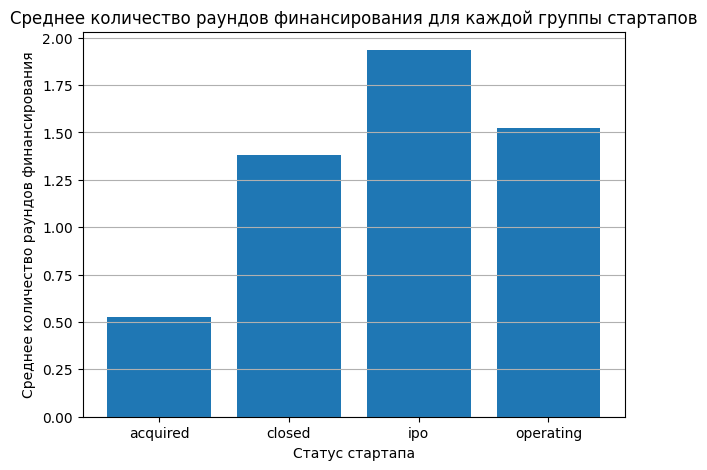

In [37]:
plt.figure(figsize=(7,5))
plt.bar(df_grouped['status'], df_grouped['funding_rounds'])
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.title('Среднее количество раундов финансирования для каждой группы стартапов')
plt.grid(axis='y')
plt.show()

По полученным результатам можно заметить, что в среднем чтобы стартапу стать активно действующим (operating) он должен пройти около 2 раундов финансирования, для становления публичным - 1.5 раундов, компании, которые прошли меньше одного раунда поглощаются

### Промежуточный вывод
В ходе исследовательского анализа были выполнены следующие действия:
* Объеденены датафреймы `company_df` (данные компаний) и `acq_df`(данные о продаже компаний)
* Были проанализированы выбросы в столбце `funding_total`, был сделан вывод, что выбросы возможно не являются аномальными
* Были расчитаны верхняя и нижняя границы выбросов для столбца `funding_total`, определено что они соотвествуют 0 и 86 процентилям
* Был создан список категорий стартапов, которые могут заинтересовать крупных инвесторов
* Было определено среднее количество раундов финансирования проходило до продажи, закрытия, выхода на биржу и активного функционирования, было обнаружено что необходимо пройти около 2 раундов, чтобы стать активно действующим стартапам, компании, которые проходили меньше 1 раунда как правило были проданы  

## Итоговый вывод и рекомендации
### Что было сделано
1. Проведено знакомство с данными
2. В таблице `company_and_rounds.csv` названия столбцов были приведены к snake_case
3. Столбцы содержащие временные сведения были приведены к типу datetime, оставльные столбцы с неверным типом данных пока не были приведены к верному из-за пропусков, чья обработка требует более глубокого погружения 
4. Была оценена полнота данных: да большое количество данных, нужное заказчику утерено, но оставшегося объема достаточно, чтобы сделать выводы
6. Была сотавлена сводная таблица, содержащая типичные размеры средств, выделяемых в рамках 1 раунда, и общее количество раундов финансирования по годам
7. На основе этой таблицы был построен график, отражающий динамику типичного размера средств, на его основе сделан вывод, что максимальный объем средств был достигнут в 2005 году, далее наблюдалось падение, замедление которого было отмечено в 2013 году
8. Была оценена полната сведений об образовании сотрудников стартапов, замечено, что закономерность нелинейная доля сведений об образовании в средних компаниях выше, чем в маленьких и крупных, возможно из-за более строго учета и того, что в маленьких стартапах пока работает только 1 человек
9. Было установлено что объединять таблицы `people.csv` и `company_and_rounds.csv` по столбцу `network_username`, нельзя да информация дублируется, но скорее всего это из-за того что стартап был назван именем создателя
10. Было обнаружено, что таблица `company_and_rounds.csv` была создана из двух, сейчас эта таблица разделена на 2 датафрейма company_df и rounds_df
11. Данные из датафреймов `company_df` (данные компаний) и `acq_df` соединены и отфильтрованы по требованиям, указанным в брифе
12. Был произведен анализ выбросов в столбце `funding_total`: установлено  что 1/4 столбца содержит нули, в столбце имеются выбросы, значение наибольшего равно 5,7 млрд, однако возможно это особенность данных
13. Были расчитаны верхняя и нижняя границы выбросов для столбца `funding_total`, определено что они соотвествуют 0 и 86 процентилям
14. Был составлен список категорий, в которых могли бы быть заинтересованы инвесторы
15. Было подсчитано среднее количество раундов финансирования для каждого статуса стартапа, на основе этих расчётов была построена диаграмма
### Рекомендации
1. В дальнейшем стоит обрать внимание на столбец `funding_total` и узнать точную природу выбросов
2. Инвестроам стоит обрать внимание на такие категории стартапов как автомобильные, недвижимость, производство и биотехнологии, инвестирования в этих категориях может быть рискованым, но должно принести высокую прибыль в будущем
3. Также бля компаний. которые заинтересованы в покупке стартапа стоит обратить внимание на стартапы, которые прошли меньше обного раунда финансирования